<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Author Name: John Holliday Assignment Number: Project 4 Date: 2/21/2021 Purpose: The purpose of this assignment is to look at the data and read from a CSV. The data contains information about an automobile company that is wondering what the current market conditions like. We perform analysis on the data first and cleanse the data. We also plot the correlation values on a heatmap. We then create pipelines for missing values, scaling, and encoding. After that we create pipelines for the following models; SVC(linear, poly, RBF) and decision tree (gini and entropy). After that we display the knowledge from a decision tree. We then plot the accuracy from before and after hyperoptimization.

In [24]:
# mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
# read csv from Google Drive and initlize imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

df_train = pd.read_csv('gdrive/My Drive/Train.csv')

df_test = pd.read_csv('gdrive/My Drive/Test.csv')

In [26]:
# drop na values
df_train.dropna(axis=0, inplace=True)

In [27]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


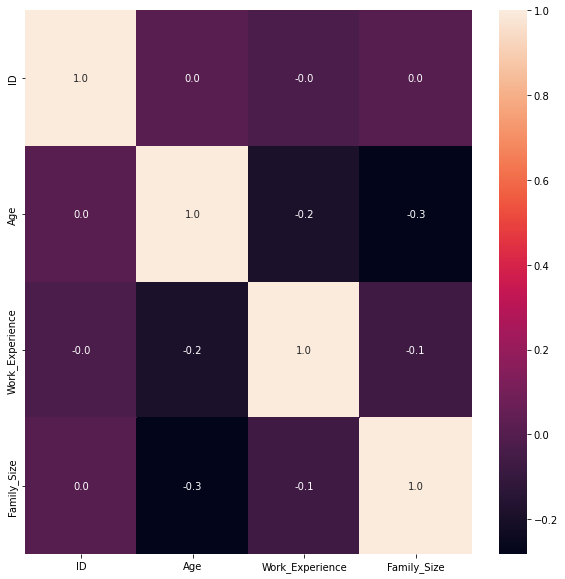

In [28]:
# correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.1f')
plt.show()

In [29]:
df_train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [30]:
df_train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

# create pipeline for onject types
object_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

object_transformer = Pipeline(steps = [
                                      # use most frequent imputer, can use mean, median, etc.
                                       ('imputer', SimpleImputer(strategy='most_frequent')),
                                      #  assigned int values
                                       ('ordinal', OrdinalEncoder())
])
                                       

# pipeline that is for numeric attributes                                       
number_cols=['ID', 'Age', 'Work_Experience', 'Family_Size']
number_transformer = Pipeline(steps=[
    # performs k nearest neighbor
    ('imputer', KNNImputer(n_neighbors=5)),
    # makes mean equal to zero and scales the data
    ('scaler', StandardScaler())
])                                     

# performs column transofrmation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', number_transformer, number_cols),
        ('obj', object_transformer, object_cols)
    ])

In [32]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,6665.00000,6665.000000,6665.000000,6665.000000
mean,463519.84096,43.536084,2.629107,2.841110
std,2566.43174,16.524054,3.405365,1.524743
min,458982.00000,18.000000,0.000000,1.000000
25%,461349.00000,31.000000,0.000000,2.000000
50%,463575.00000,41.000000,1.000000,2.000000
75%,465741.00000,53.000000,4.000000,4.000000
max,467974.00000,89.000000,14.000000,9.000000


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

x = df_train
y = df_train['Segmentation']
number_fold = 10

# linear kernel classification 
linear_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear'))])

linear_svc_clf_score = cross_val_score(linear_svc_clf, x, y, cv=number_fold, scoring="accuracy").mean()

# RBF kernel classification
rbf_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf'))])

rbf_svc_clf_score = cross_val_score(rbf_svc_clf, x, y, cv=number_fold, scoring="accuracy").mean()

# Poly kernel classification
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly'))])

poly_svc_clf_score = cross_val_score(poly_svc_clf, x, y, cv=number_fold, scoring="accuracy").mean()

# gini decision tree
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_dt_score = cross_val_score(gini_dt_clf, x, y, cv=number_fold, scoring="accuracy").mean()

# entopy decision tree
entopy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

entopy_dt_clf_score = cross_val_score(entopy_dt_clf, x, y, cv=number_fold, scoring="accuracy").mean()

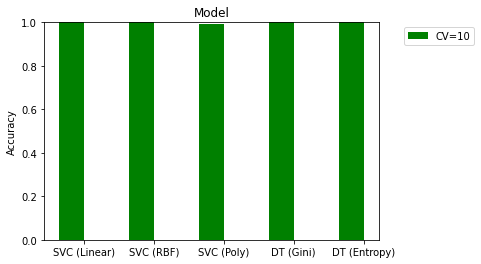

In [34]:
# labels for the plot
labels = ['SVC (Linear)', 'SVC (RBF)', 'SVC (Poly)', 'DT (Gini)', 'DT (Entropy)']
# scores calultaed from each classification 
training_scores = [linear_svc_clf_score, rbf_svc_clf_score, poly_svc_clf_score, gini_dt_score, entopy_dt_clf_score]

X = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, training_scores, width, label='CV=10', color='green')

ax.set_ylabel('Accuracy')
ax.set_xticks(X)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

# plots each models accuracy
plt.title('Model')
plt.show()

|--- Segmentation <= 2.50
|   |--- Segmentation <= 1.50
|   |   |--- Segmentation <= 0.50
|   |   |   |--- class: A
|   |   |--- Segmentation >  0.50
|   |   |   |--- class: B
|   |--- Segmentation >  1.50
|   |   |--- class: C
|--- Segmentation >  2.50
|   |--- class: D



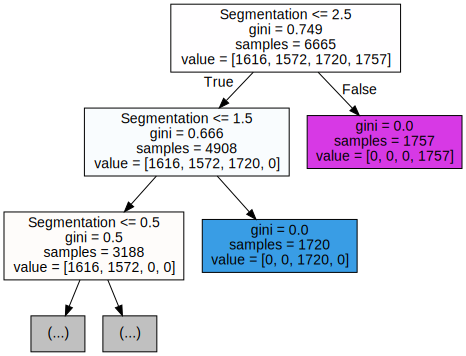

In [35]:
from matplotlib import pyplot
from sklearn.tree import export_text, export_graphviz
import graphviz

# refit the gini dt model 
gini_dt_clf['classifier'].fit(preprocessor.fit_transform(x), y)


# creates and prints the decision tree as a series of logical rules
text_representation = export_text(gini_dt_clf['classifier'],
                                  feature_names=['ID', 'Gender', 'Ever_married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation'],
                                  max_depth=2)
print(text_representation)


# creates drawing of decision tree
dot_data = export_graphviz(gini_dt_clf['classifier'],
                                  max_depth=2,
                                  feature_names=['ID', 'Gender', 'Ever_married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation'],
                                  filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [36]:
# Next we use GridSearchCV to find best hyperparameter inputs for decision tree model


# first param that takes gini and entropy decision trees
param_1 = { 'criterion':['gini','entropy'],   
              'max_depth': np.arange(3, 15)}     
   
    
# test all values using gridsearch
grid_search1 = GridSearchCV(entopy_dt_clf['classifier'], 
                           param_1, 
                           cv=3)
    
# call grid_search1 and fit the model
grid_search1.fit(preprocessor.fit_transform(x), y)

print("After hyperparameter optimization, best accuracy is %.2f \n" % (grid_search1.best_score_))

print("The best hyperparamters for decision tree model", grid_search1.best_params_)

After hyperparameter optimization, best accuracy is 1.00 

The best hyperparamters for decision tree model {'criterion': 'gini', 'max_depth': 3}


In [37]:
# next we use gridsearch to find best hyperparameter values for SVC models
param_grid2 = {'kernel':['poly', 'linear', 'RBF'], 
              'gamma':['scale','auto'],      
              'degree': np.arange(4,8),      
              'C': np.arange(1,10)}        
   
    
# test all the values using gridsearch
grid_search2 = GridSearchCV(poly_svc_clf['classifier'], 
                           param_grid2, 
                           cv=3)
    
# refit the model
grid_search2.fit(preprocessor.fit_transform(x), y)

print("After hyperparameter optimization, best accuracy is %.2f \n" % (grid_search2.best_score_))

print("The best hyperparamters for decision tree model", grid_search2.best_params_)

After hyperparameter optimization, best accuracy is 1.00 

The best hyperparamters for decision tree model {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'linear'}


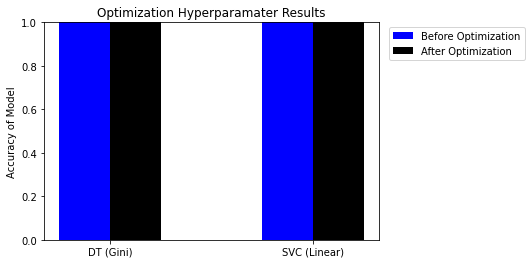

In [38]:
# plot results of grid search, before and after optimization
labels = ['DT (Gini)', 'SVC (Linear)']

# before and after scores
before_optimization_scores = [gini_dt_score, linear_svc_clf_score]
after_optimization_scores = [grid_search1.best_score_, grid_search2.best_score_]

X = np.arange(len(labels))  
width = 0.25               

fig, ax = plt.subplots()
rects1 = ax.bar(X - width/2, before_optimization_scores, width, label='Before Optimization', color='blue')
rects2 = ax.bar(X + width/2, after_optimization_scores, width, label='After Optimization', color='black')

ax.set_ylabel('Accuracy of Model')
ax.set_xticks(X)
ax.set_ylim(0,1.0)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.45, 1.0), loc='upper right')

plt.title('Optimization Hyperparamater Results')
plt.show()

Summary

We first started by anlyzing the data that we were given. We then plot a correlation heat map to see the correlation between the numeric values. After that we need to clean and prepare the data. We use different pipelines on the attributes to clean and prepare the data. After that we create pipelines to run different classification models on the data. Next, we convert the decision trees in order to see them as a text and a graph. Finally, we perform grid search in order to optimize a few hyperparameters. The results here show that the models are very accurate as each model was close to 100% before hyperparamater optimization. After Gridsearch we see that the results are all at 100%.
